<a href="https://colab.research.google.com/github/ghizlane89/0__GenIA/blob/Bootcamp/W3_D4_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importer un fichier:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

file_path = '/content/drive/My Drive/Datasets/train1.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Summarize features

import pandas as pd

# Variable cible
target = 'price_range'

# Extraire uniquement les features (toutes les colonnes sauf la cible)
features = df.drop(columns=[target])

# Créer un résumé des features
summary_features = pd.DataFrame({
    'Nom de la feature': features.columns,
    'Type de donnée': features.dtypes.values
})

# Affichage
print("📋 Résumé des features :\n")
print(summary_features.to_string(index=False))



📋 Résumé des features :

Nom de la feature Type de donnée
    battery_power          int64
             blue          int64
      clock_speed        float64
         dual_sim          int64
               fc          int64
           four_g          int64
       int_memory          int64
            m_dep        float64
        mobile_wt          int64
          n_cores          int64
               pc          int64
        px_height          int64
         px_width          int64
              ram          int64
             sc_h          int64
             sc_w          int64
        talk_time          int64
          three_g          int64
     touch_screen          int64
             wifi          int64


In [ ]:
# Price_range est la variable cible.

In [5]:
# Statistiques descriptives générales
print(df.describe().T)


                count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   43

In [6]:
 # Data Cleaning and Preprocessing:


# Afficher les valeurs manquantes
df.isnull().sum()


# ==> 0 valeurs manquantes


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [7]:
!pip install skimpy
#Test Statistics with skimpy
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2000   │ │ int64       │ 19    │                                                          │
│ │ Number of columns │ 21     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ battery_power     │   0 │      0 │     1239 │    439.4 │  501 │   851.8 │  1226 │   1615 │  1998 │ █▇▇▇▇▇  │  │
│ │ blue              │   0 │      0 │    0.495 │   0.5001 │    0 │       0 │     0 │      1 │     1 │ █    █  │  │
│ │ clock_speed       │   0 │      0 │    1.522 │    0.816 │  0.5 │     0.7 │   1.5 │    2.2 │     3 │ █▃▃▃▃▃  │  │
│ │ dual_sim          │   0 │      0 │   0.5095 │      0.5 │    0 │       0 │     1 │      1 │     1 │ █    █  │  │
│ │ fc                │   0 │      0 │    4.309 │    4.341 │    0 │       1 │     3 │      7 │    19 │  █▃▂▁▁  │  │
│ │ four_g            │   0 │      0 │   0.5215 │   0.4997 │    0 │       0 │     1 │      1 │     1 │ ▇    █  │  │
│ │ int_memory        │   0 │      0 │    32.05 │    18.15 │    2 │      16 │    32 │     48 │    64 │ █▇▇▇▇▇  │  │
│ │ m_dep             │   0 │      0 │   0.5018 │   0.2884 │  0.1 │     0.2 │   0.5 │    0.8 │     1 │ █▃▆▃▆▅  │  │
│ │ mobile_wt         │   0 │      0 │    140.2 │     35.4 │   80 │     109 │   141 │    170 │   200 │ ▇█▇▇▇█  │  │
│ │ n_cores           │   0 │      0 │    4.521 │    2.288 │    1 │       3 │     4 │      7 │     8 │ █▄▄▄▄█  │  │
│ │ pc                │   0 │      0 │    9.916 │    6.064 │    0 │       5 │    10 │     15 │    20 │ █▅▆█▆█  │  │
│ │ px_height         │   0 │      0 │    645.1 │    443.8 │    0 │   282.8 │   564 │  947.2 │  1960 │ ██▅▄▂▁  │  │
│ │ px_width          │   0 │      0 │     1252 │    432.2 │  500 │   874.8 │  1247 │   1633 │  1998 │ ▇███▇█  │  │
│ │ ram               │   0 │      0 │     2124 │     1085 │  256 │    1208 │  2146 │   3064 │  3998 │ ██▇█▇█  │  │
│ │ sc_h              │   0 │      0 │    12.31 │    4.213 │    5 │       9 │    12 │     16 │    19 │ ▇▄▅█▅█  │  │
│ │ sc_w              │   0 │      0 │    5.767 │    4.356 │    0 │       2 │     5 │      9 │    18 │ ██▆▄▂▁  │  │
│ │ talk_time         │   0 │      0 │    11.01 │    5.464 │    2 │       6 │    11 │     16 │    20 │ ▆▆▆▆▆█  │  │
│ │ three_g           │   0 │      0 │   0.7615 │   0.4263 │    0 │       1 │     1 │      1 │     1 │ ▃    █  │  │
│ │ touch_screen      │   0 │      0 │    0.503 │   0.5001 │    0 │       0 │     1 │      1 │     1 │ █    █  │  │
│ │ wifi              │   0 │      0 │    0.507 │   0.5001 │    0 │       0 │     1 │      1 │     1 │ █    █  │  │
│ │ price_range       │   0 │      0 │      1.5 │    1.118 │    0 │    0.75 │   1.5 │   2.25 │     3 │ █ █ ██  │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴──────┴─────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── 

In [15]:
# Transform categorical data into numerical format using suitable methods.

#Il n'y a pas de données catégoriels

In [8]:
import numpy as np
from scipy import stats


# Définir la cible
target = "price_range"

# Séparer les features
features = df.drop(columns=[target])


for col in features.columns:
    data = features[col]
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]

    print(f"📊 {col}")
    print(f"   → Moyenne : {mean:.2f}")
    print(f"   → Médiane : {median}")
    print(f"   → Mode    : {mode}\n")


📊 battery_power
   → Moyenne : 1238.52
   → Médiane : 1226.0
   → Mode    : 618

📊 blue
   → Moyenne : 0.49
   → Médiane : 0.0
   → Mode    : 0

📊 clock_speed
   → Moyenne : 1.52
   → Médiane : 1.5
   → Mode    : 0.5

📊 dual_sim
   → Moyenne : 0.51
   → Médiane : 1.0
   → Mode    : 1

📊 fc
   → Moyenne : 4.31
   → Médiane : 3.0
   → Mode    : 0

📊 four_g
   → Moyenne : 0.52
   → Médiane : 1.0
   → Mode    : 1

📊 int_memory
   → Moyenne : 32.05
   → Médiane : 32.0
   → Mode    : 27

📊 m_dep
   → Moyenne : 0.50
   → Médiane : 0.5
   → Mode    : 0.1

📊 mobile_wt
   → Moyenne : 140.25
   → Médiane : 141.0
   → Mode    : 182

📊 n_cores
   → Moyenne : 4.52
   → Médiane : 4.0
   → Mode    : 4

📊 pc
   → Moyenne : 9.92
   → Médiane : 10.0
   → Mode    : 10

📊 px_height
   → Moyenne : 645.11
   → Médiane : 564.0
   → Mode    : 347

📊 px_width
   → Moyenne : 1251.52
   → Médiane : 1247.0
   → Mode    : 874

📊 ram
   → Moyenne : 2124.21
   → Médiane : 2146.5
   → Mode    : 1229

📊 sc_h
   → Moyen

In [9]:
for col in features.columns:
    data = features[col]
    range_val = np.max(data) - np.min(data)
    variance = np.var(data, ddof=1)
    std_dev = np.std(data, ddof=1)

    print(f"📊 {col}")
    print(f"   → Étendue (Range) : {range_val}")
    print(f"   → Variance        : {variance:.2f}")
    print(f"   → Écart-type      : {std_dev:.2f}\n")


📊 battery_power
   → Étendue (Range) : 1497
   → Variance        : 193088.36
   → Écart-type      : 439.42

📊 blue
   → Étendue (Range) : 1
   → Variance        : 0.25
   → Écart-type      : 0.50

📊 clock_speed
   → Étendue (Range) : 2.5
   → Variance        : 0.67
   → Écart-type      : 0.82

📊 dual_sim
   → Étendue (Range) : 1
   → Variance        : 0.25
   → Écart-type      : 0.50

📊 fc
   → Étendue (Range) : 19
   → Variance        : 18.85
   → Écart-type      : 4.34

📊 four_g
   → Étendue (Range) : 1
   → Variance        : 0.25
   → Écart-type      : 0.50

📊 int_memory
   → Étendue (Range) : 62
   → Variance        : 329.27
   → Écart-type      : 18.15

📊 m_dep
   → Étendue (Range) : 0.9
   → Variance        : 0.08
   → Écart-type      : 0.29

📊 mobile_wt
   → Étendue (Range) : 120
   → Variance        : 1253.14
   → Écart-type      : 35.40

📊 n_cores
   → Étendue (Range) : 7
   → Variance        : 5.23
   → Écart-type      : 2.29

📊 pc
   → Étendue (Range) : 20
   → Variance     

In [11]:
from scipy.stats import skew, kurtosis

for col in features.columns:
    data = features[col]
    skewness = skew(data)
    kurt = kurtosis(data)

    print(f" {col}")
    print(f"   → Skewness : {skewness:.2f}")
    print(f"   → Kurtosis : {kurt:.2f}\n")


 battery_power
   → Skewness : 0.03
   → Kurtosis : -1.22

 blue
   → Skewness : 0.02
   → Kurtosis : -2.00

 clock_speed
   → Skewness : 0.18
   → Kurtosis : -1.32

 dual_sim
   → Skewness : -0.04
   → Kurtosis : -2.00

 fc
   → Skewness : 1.02
   → Kurtosis : 0.27

 four_g
   → Skewness : -0.09
   → Kurtosis : -1.99

 int_memory
   → Skewness : 0.06
   → Kurtosis : -1.22

 m_dep
   → Skewness : 0.09
   → Kurtosis : -1.27

 mobile_wt
   → Skewness : 0.01
   → Kurtosis : -1.21

 n_cores
   → Skewness : 0.00
   → Kurtosis : -1.23

 pc
   → Skewness : 0.02
   → Kurtosis : -1.17

 px_height
   → Skewness : 0.67
   → Kurtosis : -0.32

 px_width
   → Skewness : 0.01
   → Kurtosis : -1.19

 ram
   → Skewness : 0.01
   → Kurtosis : -1.19

 sc_h
   → Skewness : -0.10
   → Kurtosis : -1.19

 sc_w
   → Skewness : 0.63
   → Kurtosis : -0.39

 talk_time
   → Skewness : 0.01
   → Kurtosis : -1.22

 three_g
   → Skewness : -1.23
   → Kurtosis : -0.49

 touch_screen
   → Skewness : -0.01
   → Kurtosi

In [12]:
# Hypothese: La RAM influence la catégorie de prix

from scipy.stats import f_oneway

# Créer les groupes
group_0 = df[df['price_range'] == 0]['ram']
group_1 = df[df['price_range'] == 1]['ram']
group_2 = df[df['price_range'] == 2]['ram']
group_3 = df[df['price_range'] == 3]['ram']

# Test ANOVA
f_stat, p_val = f_oneway(group_0, group_1, group_2, group_3)

print("🔬 ANOVA sur la RAM selon price_range :")
print(f"   → F-statistic : {f_stat:.2f}")
print(f"   → p-value     : {p_val:.5f}")

# Interprétation
if p_val < 0.05:
    print("✅ Il existe une différence significative entre les groupes.")
else:
    print("❌ Aucune différence significative détectée.")




🔬 ANOVA sur la RAM selon price_range :
   → F-statistic : 3520.11
   → p-value     : 0.00000
✅ Il existe une différence significative entre les groupes.


In [13]:
# Correlation entre les features et la target


from scipy.stats import spearmanr

print("📊 Corrélations entre les features et price_range :\n")

for col in features.columns:
    coef, p = spearmanr(df[col], df['price_range'])
    print(f"{col.ljust(15)} ➝ Corrélation : {coef:.3f} | p-value : {p:.4f}")


📊 Corrélations entre les features et price_range :

battery_power   ➝ Corrélation : 0.200 | p-value : 0.0000
blue            ➝ Corrélation : 0.021 | p-value : 0.3578
clock_speed     ➝ Corrélation : -0.005 | p-value : 0.8080
dual_sim        ➝ Corrélation : 0.017 | p-value : 0.4356
fc              ➝ Corrélation : 0.024 | p-value : 0.2800
four_g          ➝ Corrélation : 0.015 | p-value : 0.5091
int_memory      ➝ Corrélation : 0.044 | p-value : 0.0477
m_dep           ➝ Corrélation : -0.000 | p-value : 0.9885
mobile_wt       ➝ Corrélation : -0.030 | p-value : 0.1768
n_cores         ➝ Corrélation : 0.005 | p-value : 0.8353
pc              ➝ Corrélation : 0.033 | p-value : 0.1423
px_height       ➝ Corrélation : 0.132 | p-value : 0.0000
px_width        ➝ Corrélation : 0.165 | p-value : 0.0000
ram             ➝ Corrélation : 0.917 | p-value : 0.0000
sc_h            ➝ Corrélation : 0.024 | p-value : 0.2889
sc_w            ➝ Corrélation : 0.025 | p-value : 0.2681
talk_time       ➝ Corrélation : 0

In [14]:
# Fonctions avancées de SciPy

from scipy.stats import normaltest, mannwhitneyu, zscore

# Exemple : tester si la distribution de 'ram' est normale
stat, p = normaltest(df['ram'])
print(f"🔬 Normalité de 'ram' : p = {p:.4f}")

# Test non paramétrique : RAM entre price_range 0 et 3
u_stat, p = mannwhitneyu(
    df[df['price_range'] == 0]['ram'],
    df[df['price_range'] == 3]['ram'],
    alternative='two-sided'
)
print(f"📊 Mann-Whitney test RAM (price 0 vs 3) : p = {p:.4f}")

# Z-score : repérer les outliers de 'battery_power'
z_scores = zscore(df['battery_power'])
outliers = df[np.abs(z_scores) > 3]
print(f"⚠️ Nombre d’outliers (z > 3) dans 'battery_power' : {outliers.shape[0]}")


🔬 Normalité de 'ram' : p = 0.0000
📊 Mann-Whitney test RAM (price 0 vs 3) : p = 0.0000
⚠️ Nombre d’outliers (z > 3) dans 'battery_power' : 0


/tmp/ipython-input-20-3255064556.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='pastel')


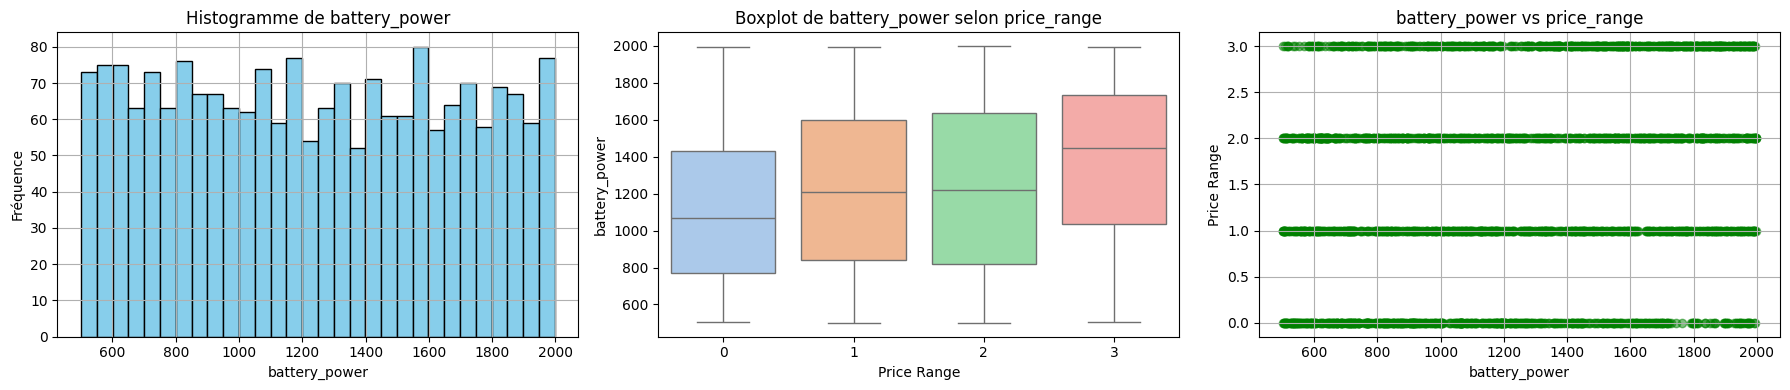

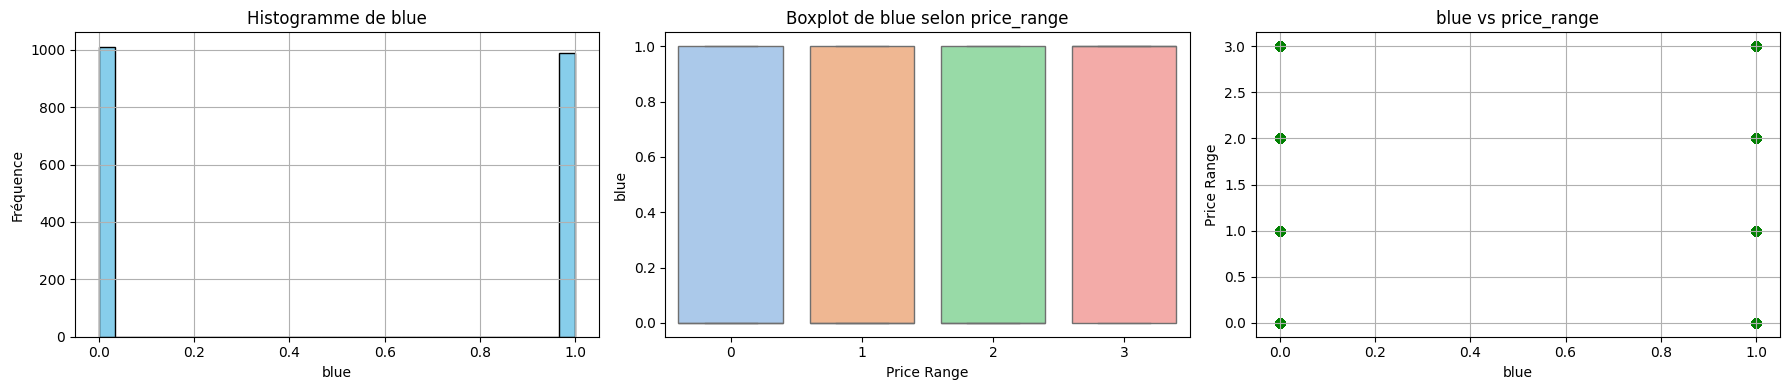

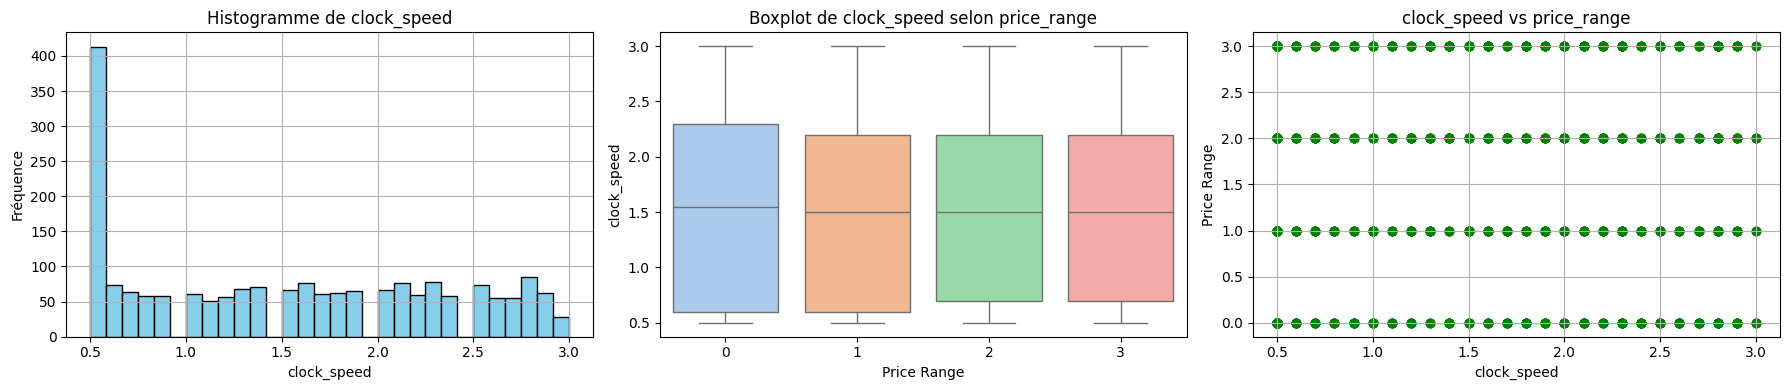

/tmp/ipython-input-20-3255064556.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='pastel')


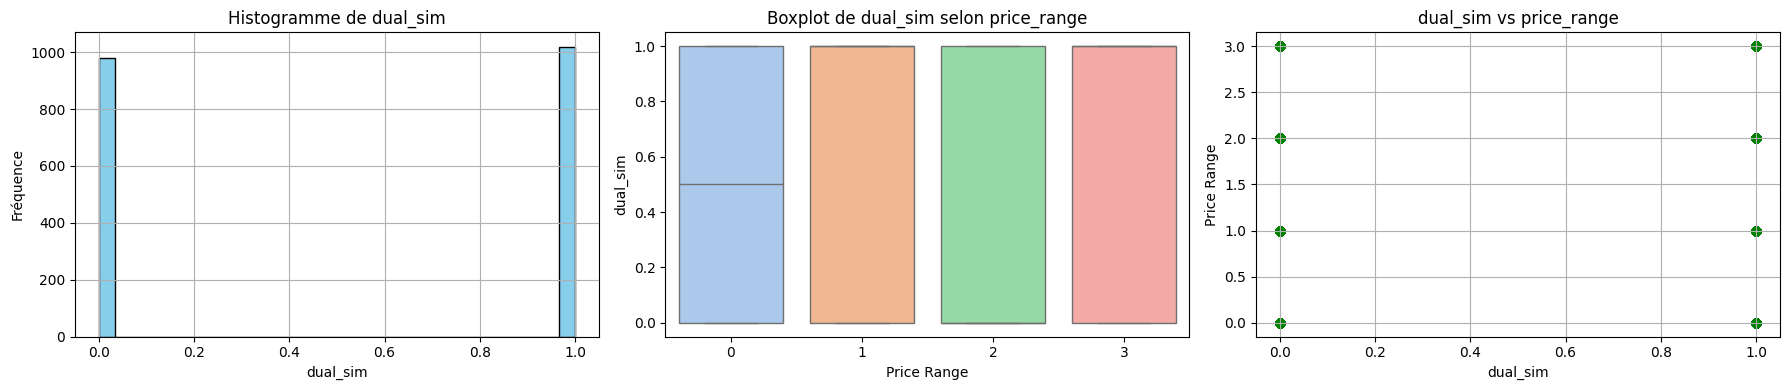

/tmp/ipython-input-20-3255064556.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='pastel')


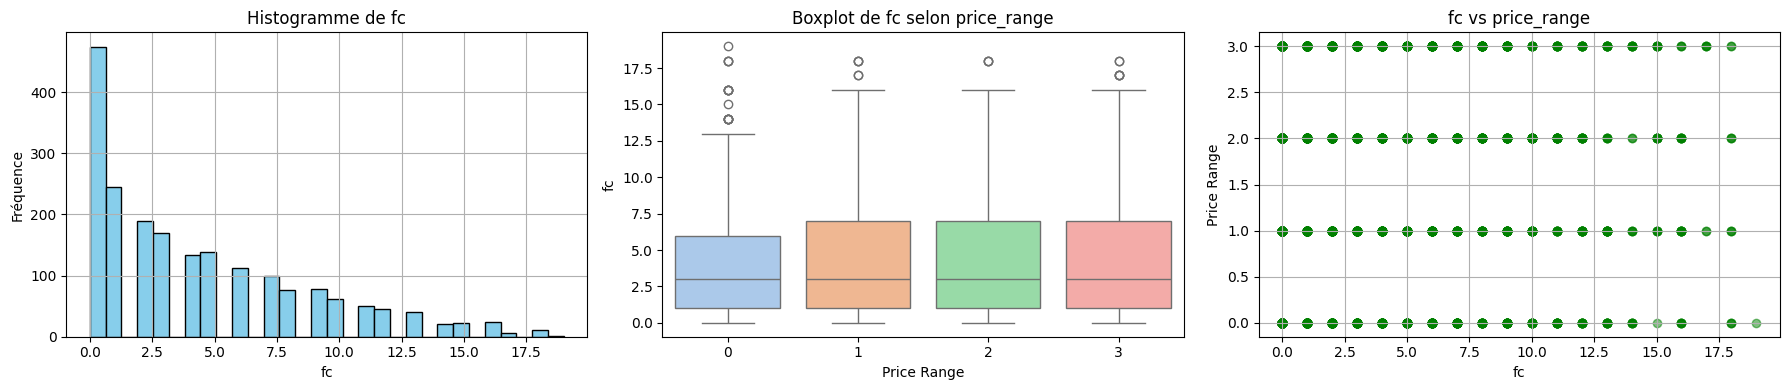

/tmp/ipython-input-20-3255064556.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='pastel')


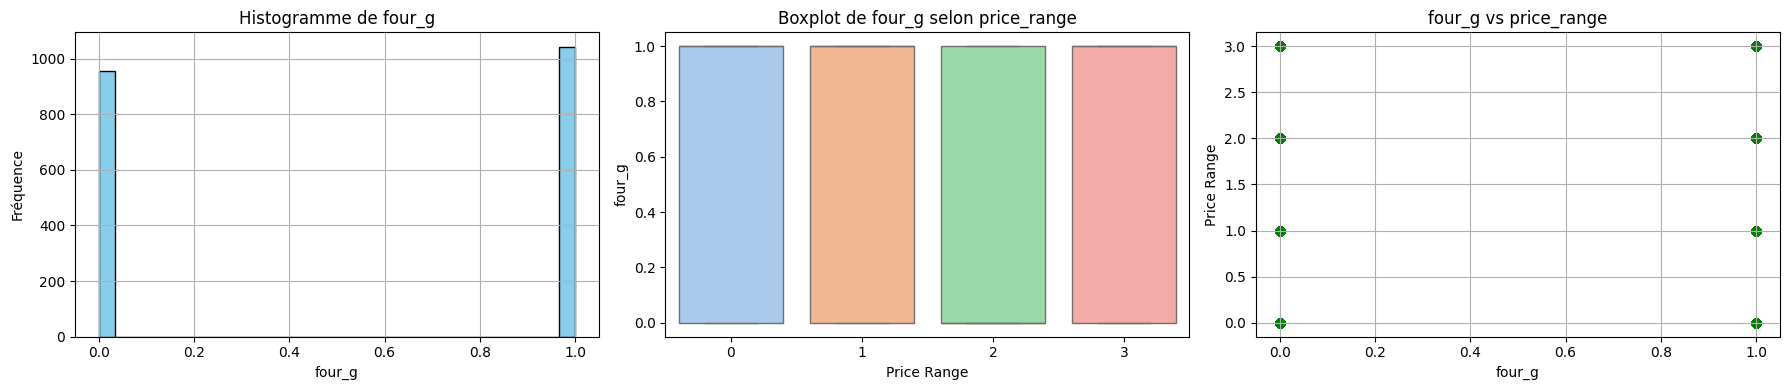

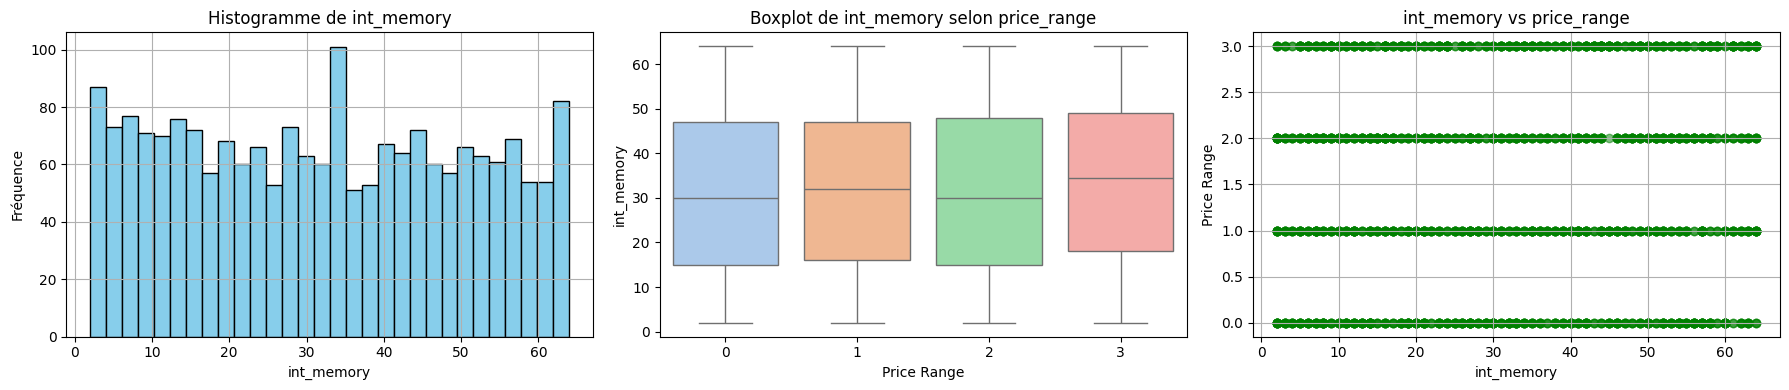

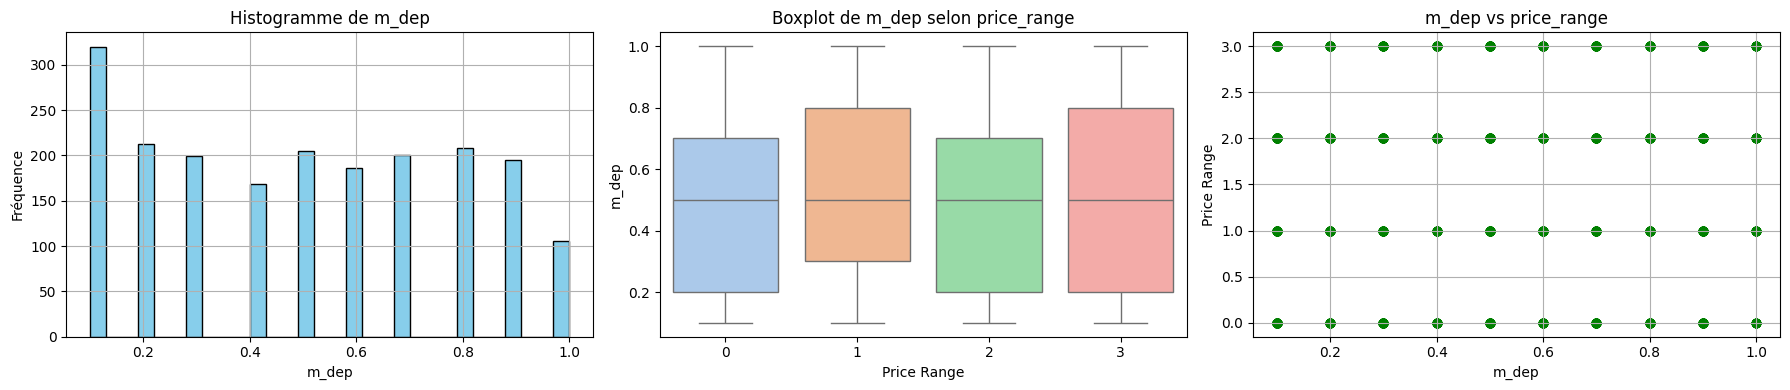

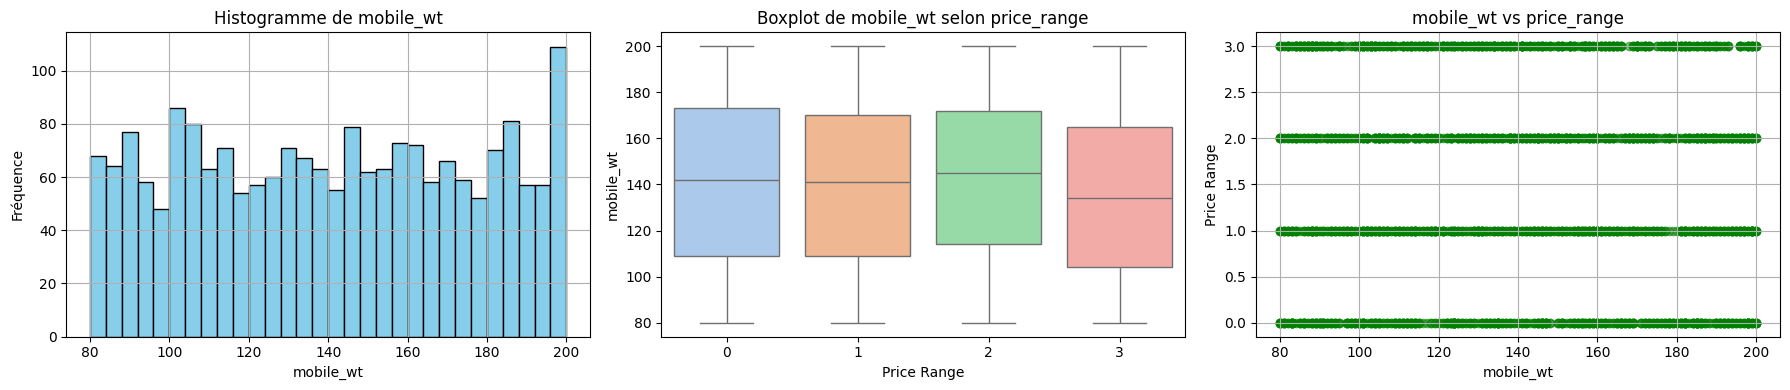

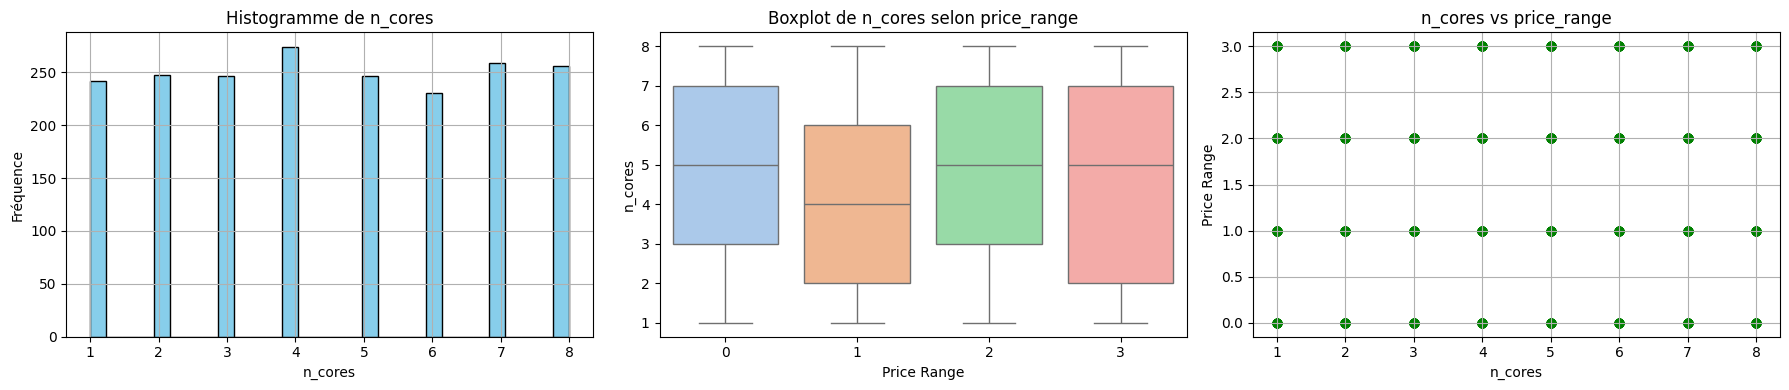

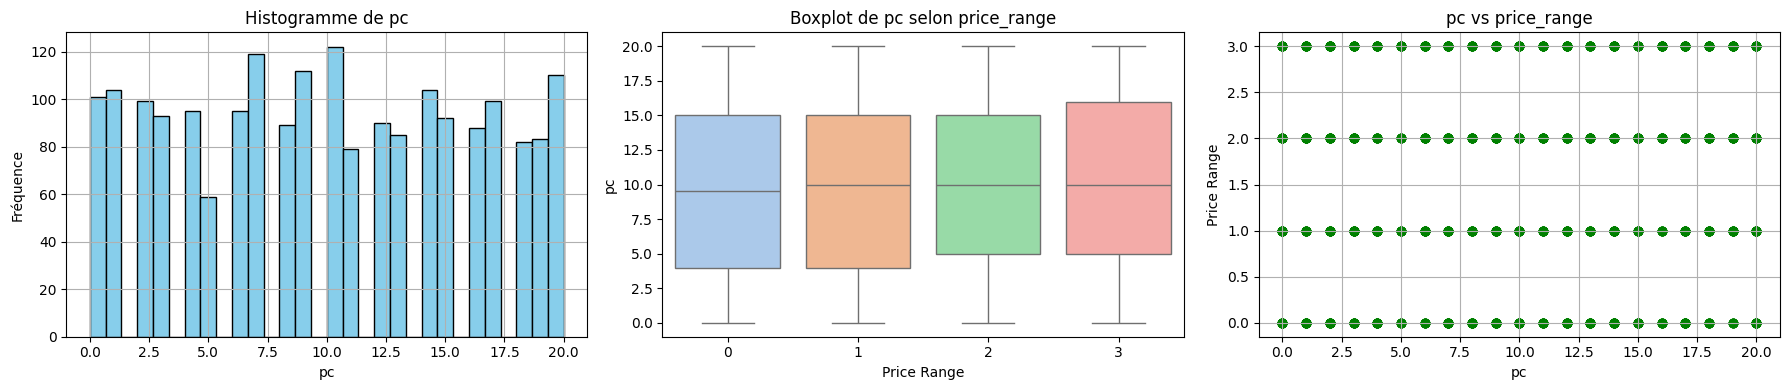

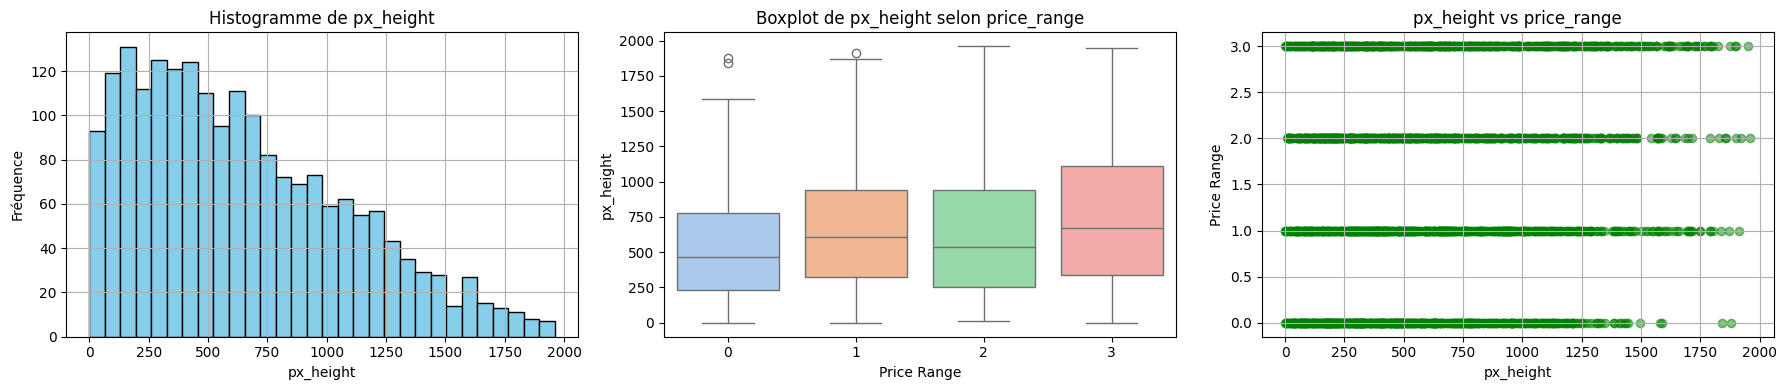

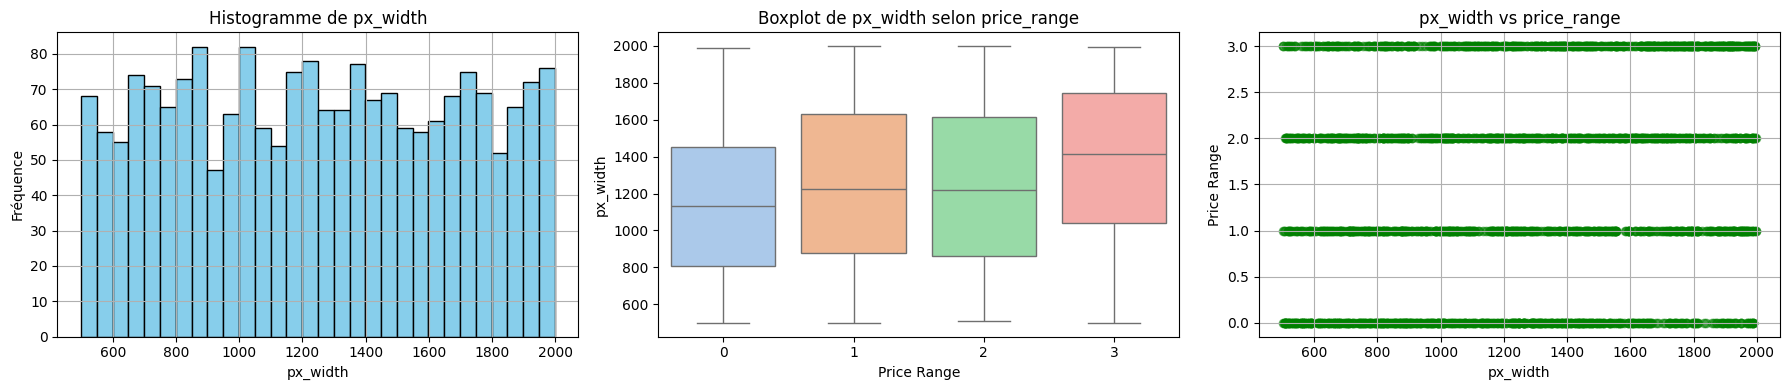

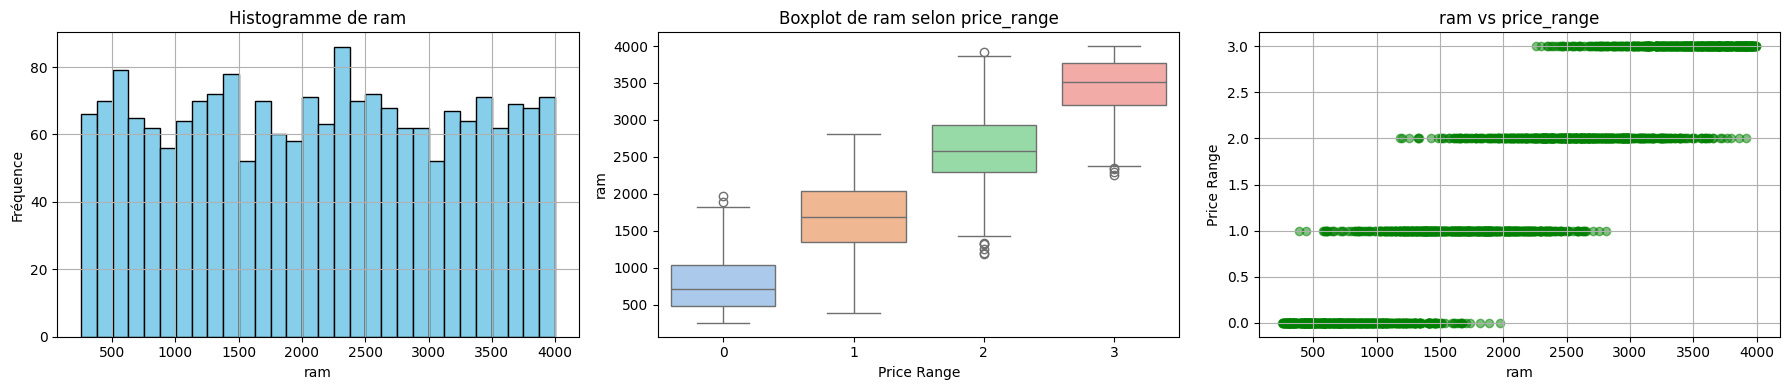

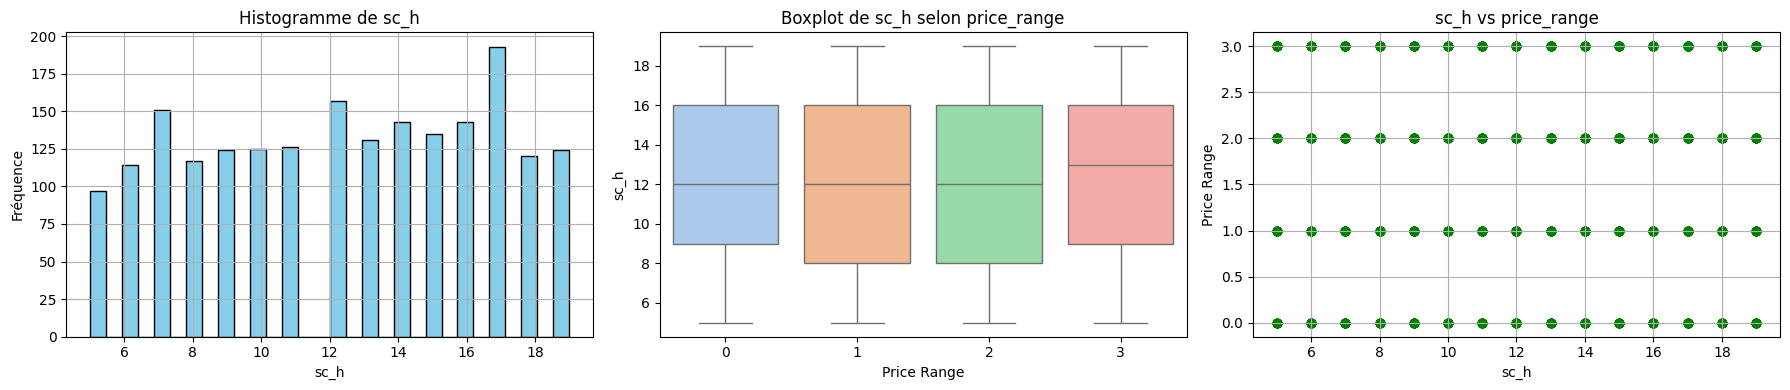

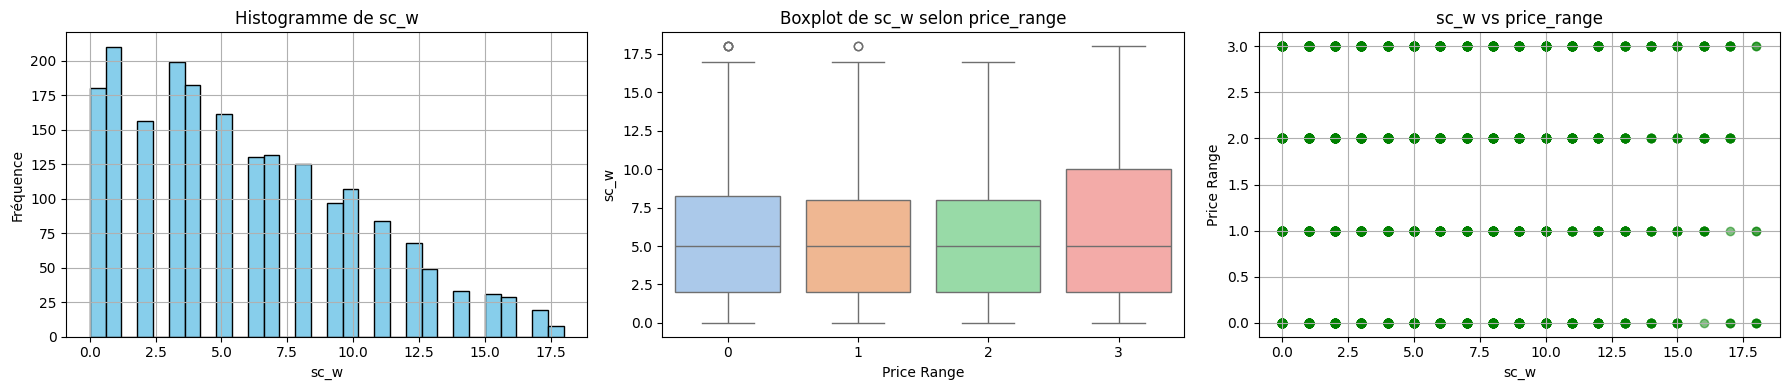

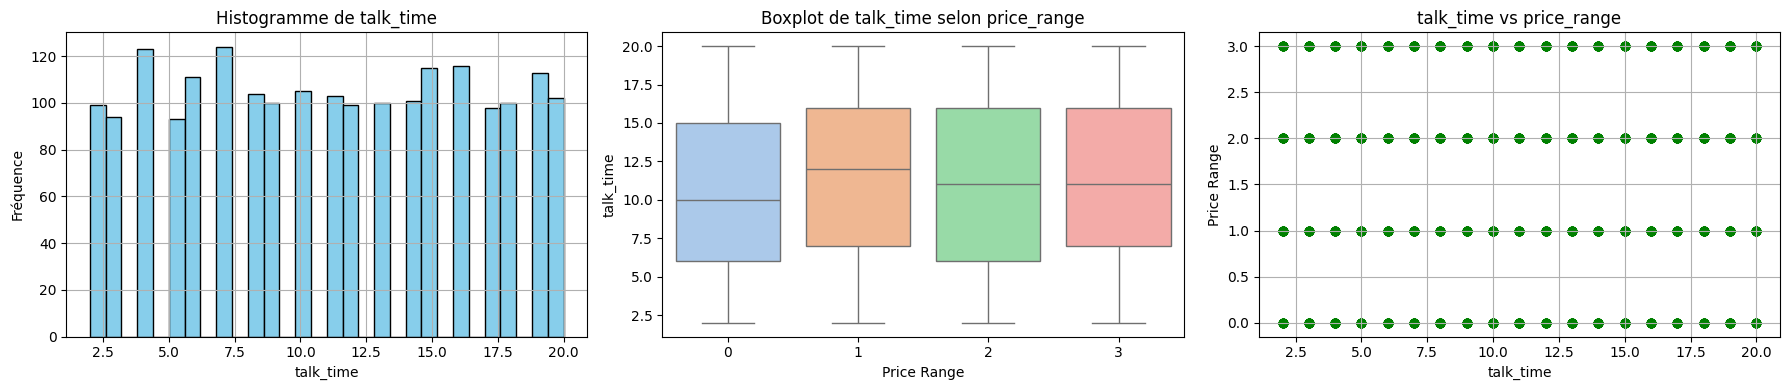

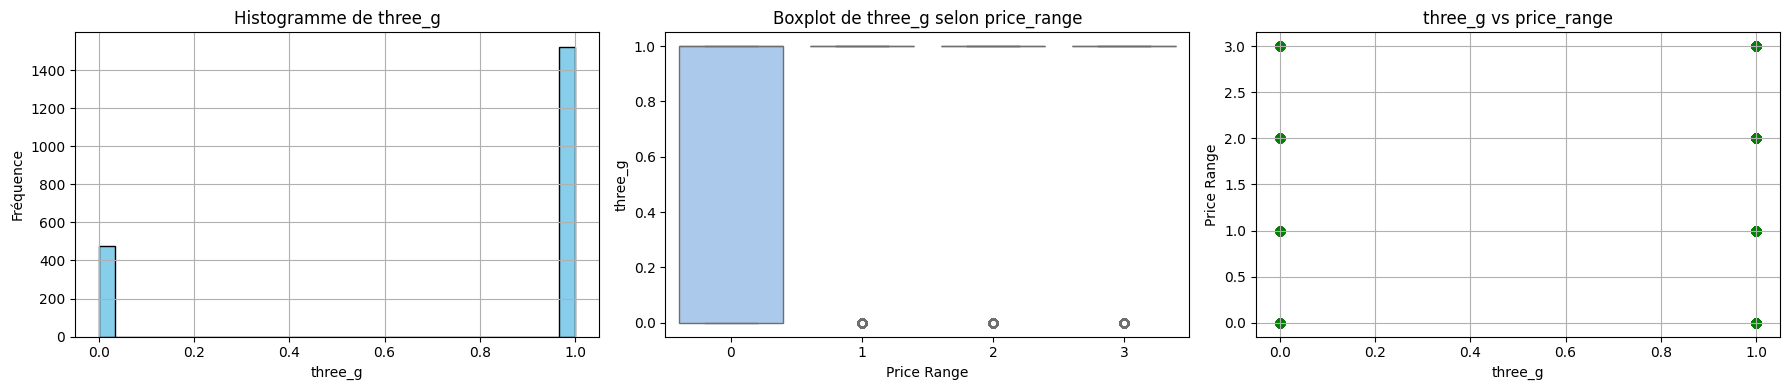

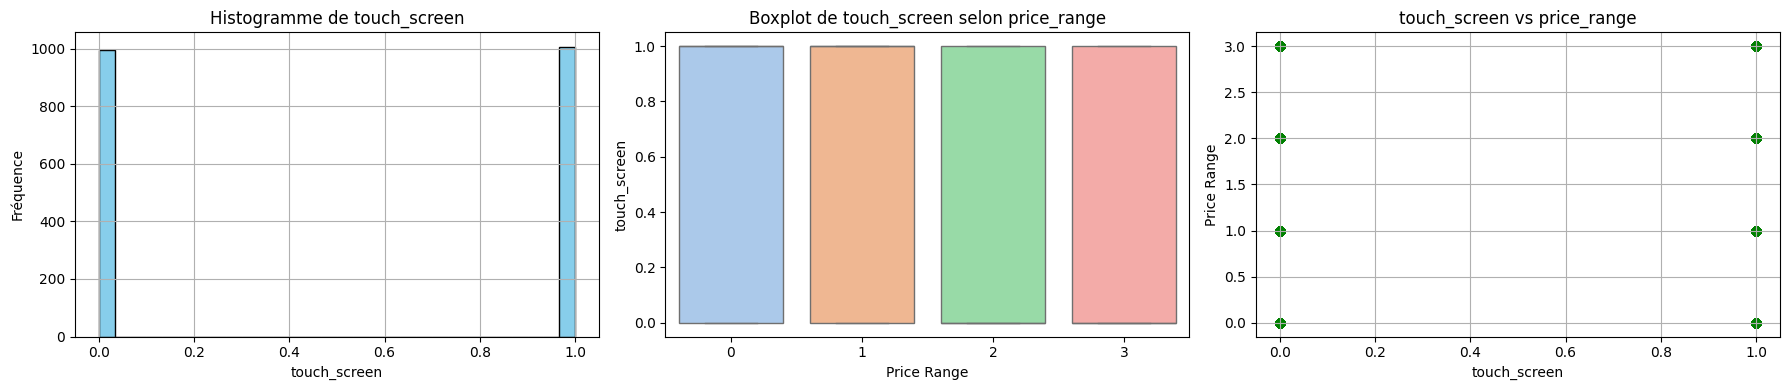

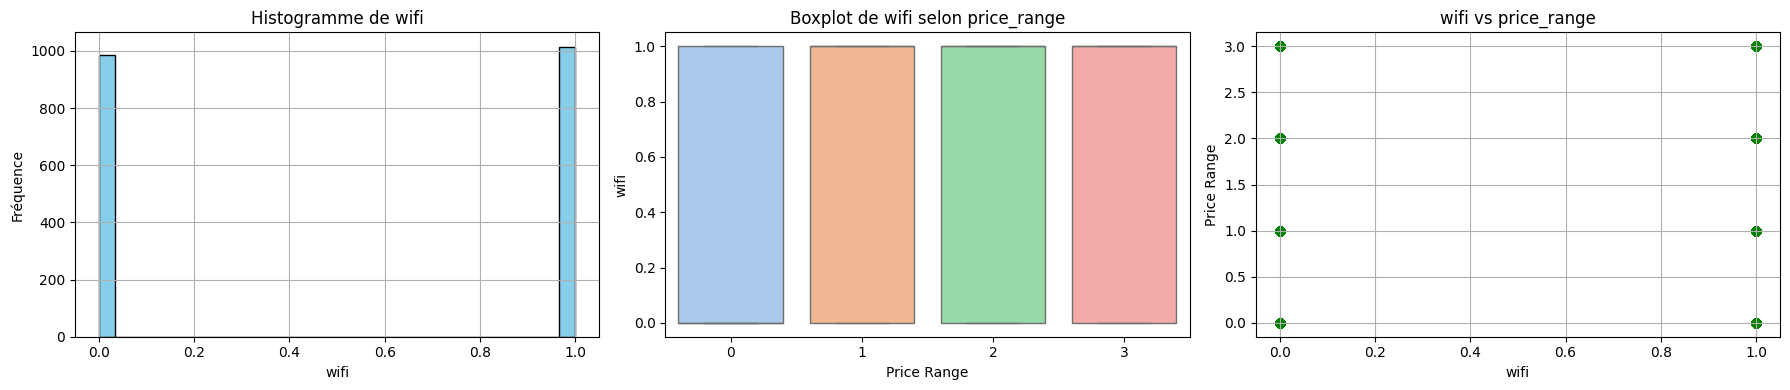

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Générer les visualisations pour chaque feature
for col in features.columns:
    plt.figure(figsize=(18, 4))

    # 1. Histogramme
    plt.subplot(1, 3, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)

    # 2. Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=target, y=col, data=df, palette='pastel')
    plt.title(f"Boxplot de {col} selon {target}")
    plt.xlabel("Price Range")
    plt.ylabel(col)

    # 3. Scatter plot
    plt.subplot(1, 3, 3)
    plt.scatter(df[col], df[target], alpha=0.5, color='green')
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel("Price Range")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


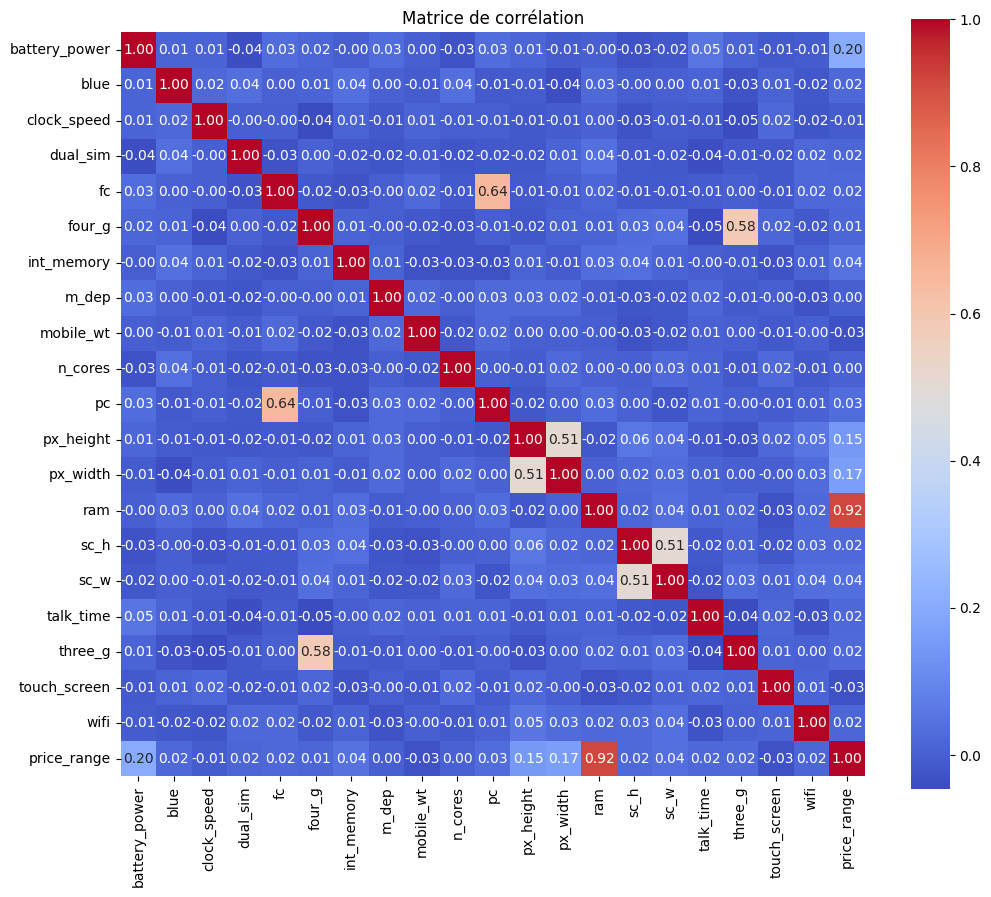

In [18]:
# Heatmap de correlation


plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
## 5. Insight Synthesis and Conclusion

### 1. Résumé des observations statistiques
Les tests ANOVA et les analyses de corrélation indiquent que certaines variables ont une influence marquée sur la variable cible `price_range`, notamment :
- RAM (très forte corrélation)
- Taille d’écran (px_height et px_width)
- Puissance de batterie

### 2. Variables les plus influentes
- **RAM** : indicateur principal de la gamme de prix
- **px_height** et **px_width** : indicateurs secondaires mais pertinents
- **battery_power** : facteur contributif mais moins direct

### 3. Faits inattendus
- Des fonctionnalités comme le Bluetooth (`blue`), la présence d’un écran tactile (`touch_screen`), ou la 4G n'ont pas de lien clair avec le prix.
Cela peut s'expliquer par leur standardisation dans tous les modèles.

### Conclusion
L’étude statistique permet d’identifier clairement les variables qui influencent la classification du prix. Ces observations peuvent être utilisées pour améliorer un modèle de classification automatique.


